In [1]:
import os
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import anndata as ad
# import gdown
import anndata2ri
import rpy2
from rpy2.robjects import r
import random
import session_info



anndata2ri.activate()
%load_ext rpy2.ipython

In [2]:
sc.settings.set_figure_params(dpi=300, frameon=False)
sc.set_figure_params(dpi=300)
sc.set_figure_params(figsize=(4, 4))

In [3]:
## download and read h5ad files

# gdown.download(id='1ZUC_HaKDudXRmRLzm78Wq0RcQV_pyD2q', 
#                output='data/totalVI_cite_pbmc_ref.h5ad', 
#                quiet=False)


# gdown.download(id='1RKhxi4h5TxL8w2n9R4ZCIAeKFK62NWUj', 
#                output='data/totalVI_cite_pbmc_query.h5ad', 
#                quiet=False)


# gdown.download(id='1zSebrJaJih6ONE5q-ws3LHZ0eu_UhDCP', 
#                output='data/totalVI_cite_pbmc_integrated.h5ad', 
#                quiet=False)

In [4]:
%%R
suppressPackageStartupMessages({
    library(SingleCellExperiment)
    library(Seurat)
    library(limma)
    library(ggplot2)
})

In [5]:
%%R
devtools::load_all(path="../../scDECAF")

GetMSigDB <- function(database="Hallmarks"){
  
  
  Hallmark_Geneset_DIR <- "../../benchmarking/GeneSets/h.all.v7.2.symbols.gmt"
  C2_DIR <- "../../benchmarking/GeneSets/c2.all.v7.2.symbols.gmt"

  if (database == "Hallmarks") {
    Hallmark_Genesets <- list()
    conn <- file(Hallmark_Geneset_DIR,open="r")
    linn <-readLines(conn)
    for (i in 1:length(linn)){
      iLine <- linn[i]
      iLine <- strsplit(iLine, "\t")
      iName <- iLine[[1]][1]
      iList <- iLine[[1]]
      iList <- iList[3:length(iList)]
      Hallmark_Genesets[[iName]] <- iList
     # Hallmark_Genesets <- c(Hallmark_Genesets, list(GeneSet(setName=iName, geneIds=iList)))
    }
    close(conn)
    return(Hallmark_Genesets)
    
  } else if (database == "C2") {
    C2_Genesets <- list()
    conn <- file(C2_DIR,open="r")
    linn <-readLines(conn)
    for (i in 1:length(linn)){
      iLine <- linn[i]
      iLine <- strsplit(iLine, "\t")
      iName <- iLine[[1]][1]
      iList <- iLine[[1]]
      iList <- iList[3:length(iList)]
      C2_Genesets[[iName]] <- iList
      #C2_Genesets <- c(C2_Genesets, list(GeneSet(setName=iName, geneIds=iList)))
    }
    close(conn)
    return(C2_Genesets)
  } else if (database == "Both"){
    Genesets <- list()
    conn <- file(Hallmark_Geneset_DIR,open="r")
    linn <-readLines(conn)
    for (i in 1:length(linn)){
      iLine <- linn[i]
      iLine <- strsplit(iLine, "\t")
      iName <- iLine[[1]][1]
      iList <- iLine[[1]]
      iList <- iList[3:length(iList)]
      Genesets[[iName]] <- iList

    }
    close(conn)

    conn <- file(C2_DIR,open="r")
    linn <-readLines(conn)
    for (i in 1:length(linn)){
      iLine <- linn[i]
      iLine <- strsplit(iLine, "\t")
      iName <- iLine[[1]][1]
      iList <- iLine[[1]]
      iList <- iList[3:length(iList)]
      Genesets[[iName]] <- iList

    }
    close(conn)
    
    return(Genesets)
  }

}


HM_genesets <- GetMSigDB(database="Hallmarks")

R[write to console]: Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom



ℹ Loading scDECAF


In [6]:
import anndata as ad
ad.__version__

'0.8.0'

In [7]:
umap_adata = sc.read('data/totalVI_cite_pbmc_integrated.h5ad')
umap_adata

AnnData object with n_obs × n_vars = 209763 × 2
    obs: 'celltype', 'dataset'
    obsm: 'X_umap'

In [8]:
adata = sc.read('data/totalVI_cite_pbmc_ref.h5ad')
adata

AnnData object with n_obs × n_vars = 152094 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'X_index', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Protein log library size', 'Number proteins detected', 'RNA log library size', '_scvi_labels', '_scvi_batch', 'dataset_name'
    var: 'mt', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltype.l2_colors', 'hvg', 'log1p', 'orig.ident_colors'
    obsm: 'X_totalvi_scarches', 'X_umap', 'protein_counts'
    layers: 'counts'

In [9]:
query = sc.read('data/totalVI_cite_pbmc_query.h5ad')
query

AnnData object with n_obs × n_vars = 57669 × 4000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.4', 'seurat_clusters', 'set', 'Resp', 'disease', 'subj_code', 'covidpt_orhealth', 'mito', 'ncount', 'nfeat', 'bust_21', 'og_clust', 'severmod_other', 'og_clusts', 'nCount_ADT', 'nFeature_ADT', 'UMAP1', 'UMAP2', 'final_clust', 'final_clust_v2', 'new_pt_id', 'Resp_og', 'final_clust_withnum', 'final_clust_review', 'Age', 'Gender', 'Gender_num', 'doublet_scores', 'predicted_doublets', 'celltype.l2', 'dataset_name', '_scvi_labels', '_scvi_batch', 'predicted_l2_scarches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltype.l2_colors', 'final_clust_review_colors', 'log1p'
    obsm: 'X_totalvi_scarches', 'X_umap', 'X_umap_project', 'pro_exp', 'protein_counts'
    layers: 'counts'

In [10]:
query_latent_adata = umap_adata.copy()

In [11]:
umap_adata.obs['Resp'] = None
umap_adata.obs['Resp'][umap_adata.obs.dataset.isin(['query'])] = query.obs.Resp.values

/tmp/ipykernel_26297/817180651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umap_adata.obs['Resp'][umap_adata.obs.dataset.isin(['query'])] = query.obs.Resp.values


/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


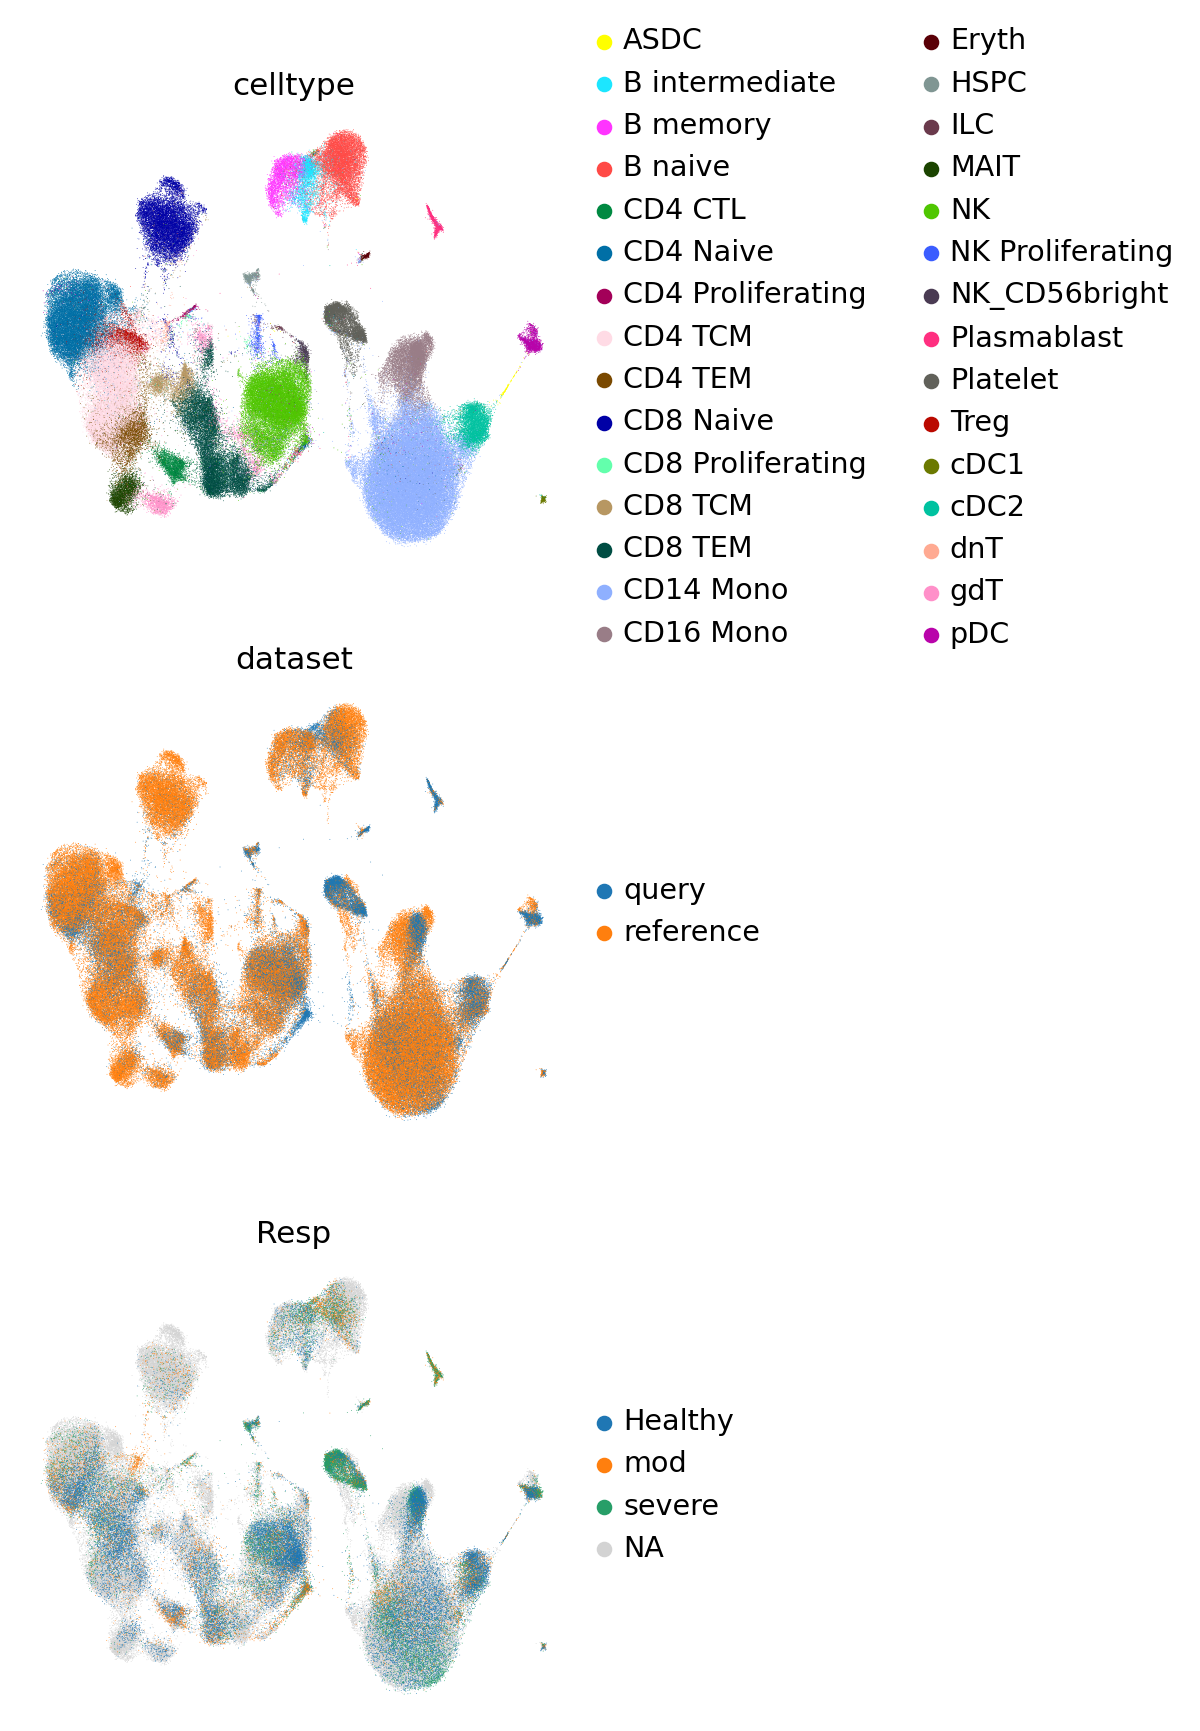

In [12]:
inds = np.random.permutation(np.arange(umap_adata.shape[0]))
sc.pl.umap(
    umap_adata[inds],
    color=["celltype", "dataset", "Resp"], 
    frameon=False,
    ncols=1,
    save='_pbmc_citeseq.png'
)

In [13]:
obsdata = umap_adata.obs

In [14]:
exprs_norm_scanpy = query.X.A.T

In [15]:
exprs_norm_scanpy.shape

(4000, 57669)

In [16]:
feature_names = query.var_names

In [17]:
obsnames = query.obs_names

In [18]:
cell_embedding = umap_adata.X[umap_adata.obs.dataset == 'query']

In [19]:
cell_embedding.shape

(57669, 2)

In [20]:
outcomes = query.obs.Resp

In [21]:
%%R -i outcomes
disease_onehot <- model.matrix(~ 0 + outcomes)
disease_onehot <- as.matrix(disease_onehot)
dim(disease_onehot)

[1] 57669     3


sctransform normalisation

In [22]:
query_ = query
query_.X = query.layers['counts']
query_.X = query_.X.A

In [23]:
type(query_.X)

numpy.ndarray

In [24]:
del query_.uns
del query_.layers
del query_.obsm

In [25]:
%%R -i query_
pbmc <- as.Seurat(query_, counts = "X", data = NULL)
pbmc

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/anndata2ri/r2py.py:102: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(exprs, obs, var, uns, obsm or None, layers=layers)


An object of class Seurat 
4000 features across 57669 samples within 1 assay 
Active assay: originalexp (4000 features, 0 variable features)


In [26]:
%%R
pbmc = RenameAssays(object = pbmc, originalexp = 'RNA')

R[write to console]: Renaming default assay from originalexp to RNA



In [27]:
%%R
# scTransform normalisation in Seurat
pbmc <- SCTransform(object = pbmc, verbose = FALSE, variable.features.n = 2000)
pbmc

An object of class Seurat 
7967 features across 57669 samples within 2 assays 
Active assay: SCT (3967 features, 2000 variable features)
 1 other assay present: RNA


In [28]:
%%R
x <- GetAssayData(object = pbmc, slot = 'data') # same as x <- bcdata[["SCT"]]@data, contains log-normalised values

In [29]:
%%R
print(x[1:10,1:10])
print(head(colnames(x)))

10 x 10 sparse Matrix of class "dgCMatrix"


R[write to console]:    [[ suppressing 10 column names ‘AAACCCACACCAGCGT-1’, ‘AAACCCACATCTCAAG-1’, ‘AAACGAAAGACCTGGA-1’ ... ]]



                                             
AL645608.8 . .        . . .         . . . . .
HES4       . .        . . .         . . . . .
ISG15      . 1.609438 . . .         . . . . .
TNFRSF18   . .        . . .         . . . . .
TNFRSF4    . .        . . .         . . . . .
ANKRD65    . .        . . .         . . . . .
AL590822.2 . .        . . .         . . . . .
AJAP1      . .        . . .         . . . . .
RBP7       . .        . . .         . . . . .
PGD        . .        . . 0.6931472 . . . . .
[1] "AAACCCACACCAGCGT-1" "AAACCCACATCTCAAG-1" "AAACGAAAGACCTGGA-1"
[4] "AAACGCTCAGTGGGTA-1" "AAACGCTGTAGCTTGT-1" "AAACGCTGTTTGACAC-1"


In [30]:
%%R
hvg <- VariableFeatures(object = pbmc)

In [31]:
%%R -i cell_embedding,obsnames
rownames(cell_embedding) = obsnames
rownames(disease_onehot) = obsnames
disease_encoding = ifelse(outcomes == "severe", 1, 0)
y = cbind(cell_embedding, disease_encoding)

R[write to console]: Computing optimal shrinkage value by cross-validation

R[write to console]: Fitting penalized multi-response gaussian GLM with alpha 0.011

R[write to console]: Returning selected genesets with non-zero regression coefficients



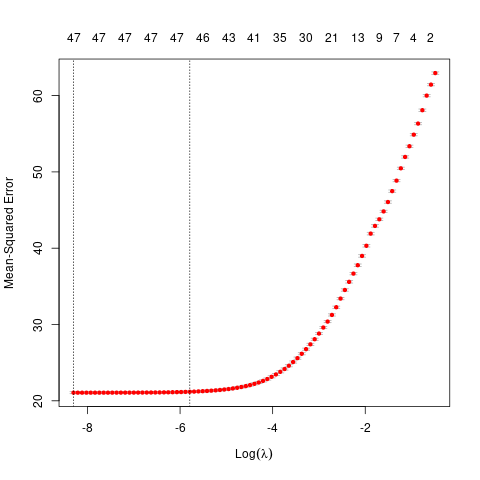

In [32]:
%%R
selected_gs <- pruneGenesets(data = x, genesetlist = HM_genesets, hvg = hvg,
                            embedding = y, min_gs_size = 3, lambda = exp(-4.5)) 

In [33]:
%%R
as.character(selected_gs)

 [1] "HALLMARK_TNFA_SIGNALING_VIA_NFKB"          
 [2] "HALLMARK_HYPOXIA"                          
 [3] "HALLMARK_CHOLESTEROL_HOMEOSTASIS"          
 [4] "HALLMARK_MITOTIC_SPINDLE"                  
 [5] "HALLMARK_IL6_JAK_STAT3_SIGNALING"          
 [6] "HALLMARK_G2M_CHECKPOINT"                   
 [7] "HALLMARK_APOPTOSIS"                        
 [8] "HALLMARK_ESTROGEN_RESPONSE_EARLY"          
 [9] "HALLMARK_ESTROGEN_RESPONSE_LATE"           
[10] "HALLMARK_ANDROGEN_RESPONSE"                
[11] "HALLMARK_MYOGENESIS"                       
[12] "HALLMARK_PROTEIN_SECRETION"                
[13] "HALLMARK_INTERFERON_ALPHA_RESPONSE"        
[14] "HALLMARK_INTERFERON_GAMMA_RESPONSE"        
[15] "HALLMARK_APICAL_JUNCTION"                  
[16] "HALLMARK_APICAL_SURFACE"                   
[17] "HALLMARK_HEDGEHOG_SIGNALING"               
[18] "HALLMARK_COMPLEMENT"                       
[19] "HALLMARK_PI3K_AKT_MTOR_SIGNALING"          
[20] "HALLMARK_MTORC1_SIGNALING"                 


In [34]:
%%R 

target <- genesets2ids(x[match(hvg, rownames(x)),], HM_genesets[selected_gs])

dim(x)
dim(target)



ann_res <- scDECAF(data = x, gs = target, standardize = FALSE, 
                   hvg = hvg, k = 20, embedding = y,
                   n_components = ncol(target) - 1, max_iter = 2, thresh = 0.5)


R[write to console]: Learning geneset representations by CCA using 39 dimensions...




 Permutation  1  out of  10  12345678910
 Permutation  2  out of  10  12345678910
 Permutation  3  out of  10  12345678910
 Permutation  4  out of  10  12345678910
 Permutation  5  out of  10  12345678910
 Permutation  6  out of  10  12345678910
 Permutation  7  out of  10  12345678910
 Permutation  8  out of  10  12345678910
 Permutation  9  out of  10  12345678910
 Permutation  10  out of  10  12345678910
123456
123456789101112
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112

R[write to console]: Assigning cells to genesets in latent space...

R[write to console]: Verifying assignments by weighted k-nn...

R[write to console]: using 20 nearest neighbors and confidence threshold 0.5

R[write to console]: cell-geneset assignment completed.



In [35]:
%%R
scores = attributes(ann_res)$raw_scores
dim(scores)

[1] 57669    40


In [36]:
%%R -o scores
scores = data.frame(scores)

In [37]:
umap_adata.obs_names = np.concatenate((query.obs_names.values, adata.obs_names.values))

In [38]:
umap_adata.obs = pd.concat((obsdata, scores, query.obs.Resp, query.obs.Gender), axis = 1)

In [39]:
%%R -o selected_gs_

selected_gs_ = data.frame(pathway = as.character(selected_gs))

In [40]:
selected_gs_ = selected_gs_.iloc[:,0].tolist()

In [41]:
selected_gs_

['HALLMARK_TNFA_SIGNALING_VIA_NFKB',
 'HALLMARK_HYPOXIA',
 'HALLMARK_CHOLESTEROL_HOMEOSTASIS',
 'HALLMARK_MITOTIC_SPINDLE',
 'HALLMARK_IL6_JAK_STAT3_SIGNALING',
 'HALLMARK_G2M_CHECKPOINT',
 'HALLMARK_APOPTOSIS',
 'HALLMARK_ESTROGEN_RESPONSE_EARLY',
 'HALLMARK_ESTROGEN_RESPONSE_LATE',
 'HALLMARK_ANDROGEN_RESPONSE',
 'HALLMARK_MYOGENESIS',
 'HALLMARK_PROTEIN_SECRETION',
 'HALLMARK_INTERFERON_ALPHA_RESPONSE',
 'HALLMARK_INTERFERON_GAMMA_RESPONSE',
 'HALLMARK_APICAL_JUNCTION',
 'HALLMARK_APICAL_SURFACE',
 'HALLMARK_HEDGEHOG_SIGNALING',
 'HALLMARK_COMPLEMENT',
 'HALLMARK_PI3K_AKT_MTOR_SIGNALING',
 'HALLMARK_MTORC1_SIGNALING',
 'HALLMARK_E2F_TARGETS',
 'HALLMARK_MYC_TARGETS_V1',
 'HALLMARK_MYC_TARGETS_V2',
 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
 'HALLMARK_INFLAMMATORY_RESPONSE',
 'HALLMARK_XENOBIOTIC_METABOLISM',
 'HALLMARK_FATTY_ACID_METABOLISM',
 'HALLMARK_GLYCOLYSIS',
 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY',
 'HALLMARK_P53_PATHWAY',
 'HALLMARK_UV_RESPONSE_UP',
 'HALLMARK_ANGIO

In [42]:
import matplotlib as mpl

# not shown because of notebook size ----

# sc.pl.umap(
#     umap_adata, 
#     color= selected_gs_, 
#     frameon=False,
#     wspace = 0.75,
#     ncols=2,
# #     vmin = -2,
# #     vmax = 2,
#     color_map=mpl.cm.RdBu_r, # RdYlBu
#     save = '_pbmc_covid_scDECAF_lambda_negative4pt5.png'
# )

In [43]:
mdata = umap_adata.obs

In [44]:
%%R -o selected_gs
genesets <- list(as.character(selected_gs))

In [45]:
selected_gs

'HALLMARK...,'HALLMARK...,'HALLMARK...,...,'HALLMARK...,'HALLMARK...,'HALLMARK...


In [46]:
genesets = list(np.array(selected_gs))

In [47]:
genesets = selected_gs_

In [48]:
len(genesets)

40

In [49]:
umap_adata.obs.drop(umap_adata.obs.columns[[23]], axis=1, inplace=True)

In [50]:
umap_adata.obs = umap_adata.obs.loc[:,~umap_adata.obs.columns.duplicated()]

In [51]:
umap_adata.obs['Resp'] = None
umap_adata.obs['Resp'][umap_adata.obs.dataset.isin(['query'])] = query.obs.Resp.values

/tmp/ipykernel_26297/817180651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umap_adata.obs['Resp'] = None
/tmp/ipykernel_26297/817180651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umap_adata.obs['Resp'][umap_adata.obs.dataset.isin(['query'])] = query.obs.Resp.values
/tmp/ipykernel_26297/817180651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umap_adata.obs['

In [52]:
umap_adata.obs['Resp'] = umap_adata.obs['Resp'].astype('category')

/tmp/ipykernel_26297/351891797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umap_adata.obs['Resp'] = umap_adata.obs['Resp'].astype('category')


In [53]:
plotdata = umap_adata.obs
plotdata = plotdata[plotdata.dataset == 'query']
plotdata = plotdata[plotdata.Resp.isin(['Healthy','severe'])]
plotdata.Resp = plotdata.Resp.cat.remove_unused_categories()

In [54]:
plotdata = plotdata.drop(columns = ['dataset'])

In [55]:
plotdata.head()

,celltype,Resp,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_G2M_CHECKPOINT,HALLMARK_APOPTOSIS,HALLMARK_ESTROGEN_RESPONSE_EARLY,...,HALLMARK_ANGIOGENESIS,HALLMARK_HEME_METABOLISM,HALLMARK_COAGULATION,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_PEROXISOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_SPERMATOGENESIS,HALLMARK_KRAS_SIGNALING_UP,Gender
AAACCCACACCAGCGT-1,Plasmablast,severe,-0.065606,-0.126435,0.124809,-0.040840,0.003975,0.314563,-0.004697,-0.081681,...,0.002807,-0.018420,0.097933,0.023284,-0.071850,0.119403,-0.069741,0.056704,-0.063688,F
AAACCCACATCTCAAG-1,NK,severe,0.017313,-0.108716,0.044677,0.133212,-0.057817,0.084977,-0.121413,0.265256,...,-0.180849,0.218540,0.012894,-0.351541,0.016544,-0.133204,0.030064,0.017817,-0.020475,F
AAACGAAAGACCTGGA-1,Plasmablast,severe,0.189169,0.096894,-0.049152,0.018251,0.139411,-0.092601,0.305205,-0.015771,...,-0.048831,0.084948,0.024322,0.020927,0.081617,-0.017271,-0.138960,0.029243,0.061189,F
AAACGCTCAGTGGGTA-1,NK,severe,0.298116,0.458089,0.167981,-0.112442,-0.138111,-0.141571,-0.074616,-0.134465,...,-0.043811,-0.038671,-0.144290,0.074373,0.127744,0.024067,0.271972,0.013880,0.036362,F
AAACGCTGTAGCTTGT-1,B memory,severe,0.295947,-0.065996,-0.041167,0.468989,0.366035,0.209026,0.126171,-0.034498,...,-0.182133,-0.061962,-0.189619,0.219884,-0.106877,0.033891,0.025635,0.156838,-0.176817,F


In [56]:
%%R -i plotdata

score_data <- plotdata



ct_pathway_res <- list()
ct_pathway_stats <- list()
for (ct in unique(plotdata$celltype)){
#     print(ct)
    ct_score_data <- score_data[score_data$celltype == ct, ]
    group <- ct_score_data$Resp
    ct_pathway_pvals <- apply(ct_score_data[, grep("celltype|Resp|Gender", colnames(ct_score_data), invert=TRUE)],
                             2,
                             FUN = function(x) t.test(x[group == 'severe'], x[group == 'Healthy'])$p.value)
                              
    ct_pathway_stat <- apply(ct_score_data[, grep("celltype|Resp|Gender", colnames(ct_score_data), invert=TRUE)],
                             2,
                             FUN = function(x) t.test(x[group == 'severe'], x[group == 'Healthy'])$statistic) 
                              
    ct_pathway_res[[ct]] <- p.adjust(ct_pathway_pvals, method = 'BH')
    ct_pathway_stats[[ct]] <- ct_pathway_stat
 
    
}

                              
ct_pathway_pval_res <- do.call(cbind, ct_pathway_res)                              
ct_pathway_stats <- do.call(cbind, ct_pathway_stats)    
ct_stats <- ct_pathway_stats                             
print(head(ct_pathway_pval_res))

                                  Plasmablast            NK    B memory
HALLMARK_TNFA_SIGNALING_VIA_NFKB 1.947132e-16 1.463318e-156 0.004691368
HALLMARK_HYPOXIA                 2.784879e-11  9.354439e-13 0.394854684
HALLMARK_CHOLESTEROL_HOMEOSTASIS 1.474247e-02  6.745558e-01 0.237800184
HALLMARK_MITOTIC_SPINDLE         8.397455e-01  4.267123e-03 0.047264488
HALLMARK_IL6_JAK_STAT3_SIGNALING 3.266607e-01  2.891528e-03 0.880057481
HALLMARK_G2M_CHECKPOINT          9.053070e-02  3.276571e-11 0.837593137
                                        Eryth      B naive         cDC2
HALLMARK_TNFA_SIGNALING_VIA_NFKB 4.342667e-06 3.121384e-05 5.868514e-85
HALLMARK_HYPOXIA                 3.904979e-02 2.200880e-02 3.488777e-10
HALLMARK_CHOLESTEROL_HOMEOSTASIS 8.641077e-01 2.818595e-01 1.625616e-14
HALLMARK_MITOTIC_SPINDLE         2.187406e-07 9.100087e-01 2.027419e-02
HALLMARK_IL6_JAK_STAT3_SIGNALING 1.373123e-01 4.768176e-01 2.435751e-33
HALLMARK_G2M_CHECKPOINT          9.517103e-02 4.962921e-01 1.159

In [57]:
%%R
print(table(ct_pathway_pval_res[,"NK Proliferating"] < 0.05))


FALSE  TRUE 
   36     3 


In [58]:
%%R
print(table(ct_pathway_pval_res < 0.05))


FALSE  TRUE 
  672   498 


In [59]:
%%R
print(dim(ct_pathway_pval_res))

[1] 39 30


In [60]:
%%R
print(dim(ct_stats))
print(dim(ct_pathway_pval_res))

[1] 39 30
[1] 39 30


In [61]:
%%R
print(head(rownames(ct_stats)))

[1] "HALLMARK_TNFA_SIGNALING_VIA_NFKB" "HALLMARK_HYPOXIA"                
[3] "HALLMARK_CHOLESTEROL_HOMEOSTASIS" "HALLMARK_MITOTIC_SPINDLE"        
[5] "HALLMARK_IL6_JAK_STAT3_SIGNALING" "HALLMARK_G2M_CHECKPOINT"         


In [62]:
%%R
#better visualisation to identify MCPs, for example
 # FDR
keep <- (ct_pathway_pval_res < 0.05)

# set T-stats to zero for insignificant hints
ct_stats[!keep] <- 0
# drop all-zero rows and columns
keep_col <- colSums(ct_stats!=0) > 0
ct_stats <- ct_stats[rowSums(ct_stats != 0) > 0, keep_col] 
ct_stats <- scale(ct_stats) # monocyte stats are very large - normalise per cell type
print(dim(ct_stats))


ord_pathways <- hclust( dist(ct_stats, method = "euclidean"), method = "ward.D")$order
print(length(ord_pathways))

ord_celltypes <- hclust( dist(t(ct_stats), method = "euclidean"), method = "ward.D")$order
print(length(ord_celltypes))

[1] 39 26
[1] 39
[1] 26


In [63]:
%%R
ct_stats <- ct_stats[ord_pathways, ord_celltypes]

ct_pathway_stats <- data.frame(ct_stats)
ct_pathway_stats$pathway <- rownames(ct_pathway_stats)
ct_pathway_stats <- reshape2::melt(ct_pathway_stats)
ct_pathway_stats$id <- paste(ct_pathway_stats$pathway, ct_pathway_stats$variable, sep = "_")

# add FDR vals ----
fdr_vals <- ct_pathway_pval_res
fdr_vals <- data.frame(fdr_vals)
fdr_vals$pathway <- rownames(fdr_vals)
fdr_vals <- reshape2::melt(fdr_vals)
fdr_vals$id <- paste(fdr_vals$pathway, fdr_vals$variable, sep = "_")
fdr_vals <- fdr_vals[match(ct_pathway_stats$id, fdr_vals$id),]

## FDR is applied per cell type 
ct_pathway_stats$FDR <- fdr_vals$value
ct_pathway_stats$signif <- cut(ct_pathway_stats$value, breaks=c(-Inf, 0.001, 0.01, 0.05, Inf), label=c("***", "**", "*", ""))

print(head(ct_pathway_stats))

R[write to console]: Using pathway as id variables

R[write to console]: Using pathway as id variables



                             pathway    variable      value
1   HALLMARK_TNFA_SIGNALING_VIA_NFKB Plasmablast -2.7018005
2               HALLMARK_P53_PATHWAY Plasmablast -2.4546002
3 HALLMARK_INTERFERON_ALPHA_RESPONSE Plasmablast  0.8020012
4 HALLMARK_INTERFERON_GAMMA_RESPONSE Plasmablast  1.4868214
5         HALLMARK_ANDROGEN_RESPONSE Plasmablast  0.9675423
6         HALLMARK_PROTEIN_SECRETION Plasmablast  1.3888086
                                              id          FDR signif
1   HALLMARK_TNFA_SIGNALING_VIA_NFKB_Plasmablast 1.947132e-16    ***
2               HALLMARK_P53_PATHWAY_Plasmablast 2.182592e-14    ***
3 HALLMARK_INTERFERON_ALPHA_RESPONSE_Plasmablast 4.053315e-03       
4 HALLMARK_INTERFERON_GAMMA_RESPONSE_Plasmablast 3.793364e-07       
5         HALLMARK_ANDROGEN_RESPONSE_Plasmablast 7.201411e-04       
6         HALLMARK_PROTEIN_SECRETION_Plasmablast 1.798543e-06       


In [64]:
%%R
print(head(colnames(ct_stats)))

[1] "Plasmablast"      "HSPC"             "CD8 TCM"          "NK Proliferating"
[5] "NK_CD56bright"    "CD4 CTL"         


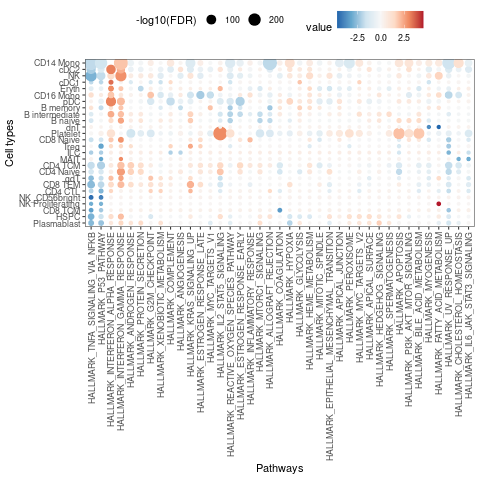

In [65]:
%%R

# note need to explicitly incorporate hclust results 

ct_pathway_stats$pathway <- factor(ct_pathway_stats$pathway, levels = rownames(ct_stats))
ct_pathway_stats$variable <- gsub("\\."," ", ct_pathway_stats$variable)
ct_pathway_stats$variable <- factor(ct_pathway_stats$variable, levels = colnames(ct_stats))


ggplot(ct_pathway_stats, aes(y=pathway, x = variable)) +
    geom_point(aes(size = -log10(FDR), color = value)) +  
    scale_color_distiller(palette = 'RdBu') +
#     geom_text(aes(label = signif), size = 1.9, color = 'black') + 
    theme_bw() + 
    coord_flip() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position="top", panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    xlab('Cell types') + ylab('Pathways') + labs(fill = expression(-log[10]~FDR))
# ggsave("figures/heatmap_HallmarkPathways_celltypes_COVIDseverityquery_alpha4pt5.png", units="in", width=8, height=8, dpi=200)

In [66]:
%%R -o final_genesets
final_genesets = rownames(ct_stats)

In [67]:
len(final_genesets)

39

In [68]:
final_genesets = list(final_genesets)
final_genesets

['HALLMARK_TNFA_SIGNALING_VIA_NFKB',
 'HALLMARK_P53_PATHWAY',
 'HALLMARK_INTERFERON_ALPHA_RESPONSE',
 'HALLMARK_INTERFERON_GAMMA_RESPONSE',
 'HALLMARK_ANDROGEN_RESPONSE',
 'HALLMARK_PROTEIN_SECRETION',
 'HALLMARK_G2M_CHECKPOINT',
 'HALLMARK_XENOBIOTIC_METABOLISM',
 'HALLMARK_COMPLEMENT',
 'HALLMARK_ANGIOGENESIS',
 'HALLMARK_KRAS_SIGNALING_UP',
 'HALLMARK_ESTROGEN_RESPONSE_LATE',
 'HALLMARK_MYC_TARGETS_V1',
 'HALLMARK_IL2_STAT5_SIGNALING',
 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY',
 'HALLMARK_ESTROGEN_RESPONSE_EARLY',
 'HALLMARK_INFLAMMATORY_RESPONSE',
 'HALLMARK_MTORC1_SIGNALING',
 'HALLMARK_ALLOGRAFT_REJECTION',
 'HALLMARK_COAGULATION',
 'HALLMARK_HYPOXIA',
 'HALLMARK_GLYCOLYSIS',
 'HALLMARK_HEME_METABOLISM',
 'HALLMARK_MITOTIC_SPINDLE',
 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
 'HALLMARK_APICAL_JUNCTION',
 'HALLMARK_PEROXISOME',
 'HALLMARK_MYC_TARGETS_V2',
 'HALLMARK_APICAL_SURFACE',
 'HALLMARK_HEDGEHOG_SIGNALING',
 'HALLMARK_SPERMATOGENESIS',
 'HALLMARK_APOPTOSIS',
 'HALLMAR

In [69]:
plotdata = pd.melt(plotdata, id_vars= ['celltype','Resp'], value_vars=final_genesets)

In [70]:
plotdata.Resp = plotdata.Resp.astype('category')

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
plotdata.head()

,celltype,Resp,variable,value
0,Plasmablast,severe,HALLMARK_TNFA_SIGNALING_VIA_NFKB,-0.065606
1,NK,severe,HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.017313
2,Plasmablast,severe,HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.189169
3,NK,severe,HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.298116
4,B memory,severe,HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.295947


In [73]:
%%R -o cd4_pathways
cd4_pathways <- ct_pathway_stats$pathway[abs(ct_pathway_stats$value) > 0.8 & ct_pathway_stats$variable %in% 'CD4 Naive']

In [74]:
len(list(cd4_pathways))

16

In [75]:
list(cd4_pathways)

['HALLMARK_TNFA_SIGNALING_VIA_NFKB',
 'HALLMARK_P53_PATHWAY',
 'HALLMARK_INTERFERON_GAMMA_RESPONSE',
 'HALLMARK_ANDROGEN_RESPONSE',
 'HALLMARK_PROTEIN_SECRETION',
 'HALLMARK_ESTROGEN_RESPONSE_LATE',
 'HALLMARK_IL2_STAT5_SIGNALING',
 'HALLMARK_ESTROGEN_RESPONSE_EARLY',
 'HALLMARK_MTORC1_SIGNALING',
 'HALLMARK_COAGULATION',
 'HALLMARK_GLYCOLYSIS',
 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
 'HALLMARK_APOPTOSIS',
 'HALLMARK_MYOGENESIS',
 'HALLMARK_UV_RESPONSE_UP',
 'HALLMARK_CHOLESTEROL_HOMEOSTASIS']

In [76]:
set(plotdata.celltype)

{'ASDC',
 'B intermediate',
 'B memory',
 'B naive',
 'CD14 Mono',
 'CD16 Mono',
 'CD4 CTL',
 'CD4 Naive',
 'CD4 Proliferating',
 'CD4 TCM',
 'CD4 TEM',
 'CD8 Naive',
 'CD8 Proliferating',
 'CD8 TCM',
 'CD8 TEM',
 'Eryth',
 'HSPC',
 'ILC',
 'MAIT',
 'NK',
 'NK Proliferating',
 'NK_CD56bright',
 'Plasmablast',
 'Platelet',
 'Treg',
 'cDC1',
 'cDC2',
 'dnT',
 'gdT',
 'pDC'}

In [77]:
cd4_pathways = list(cd4_pathways)

/tmp/ipykernel_26297/1643806897.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


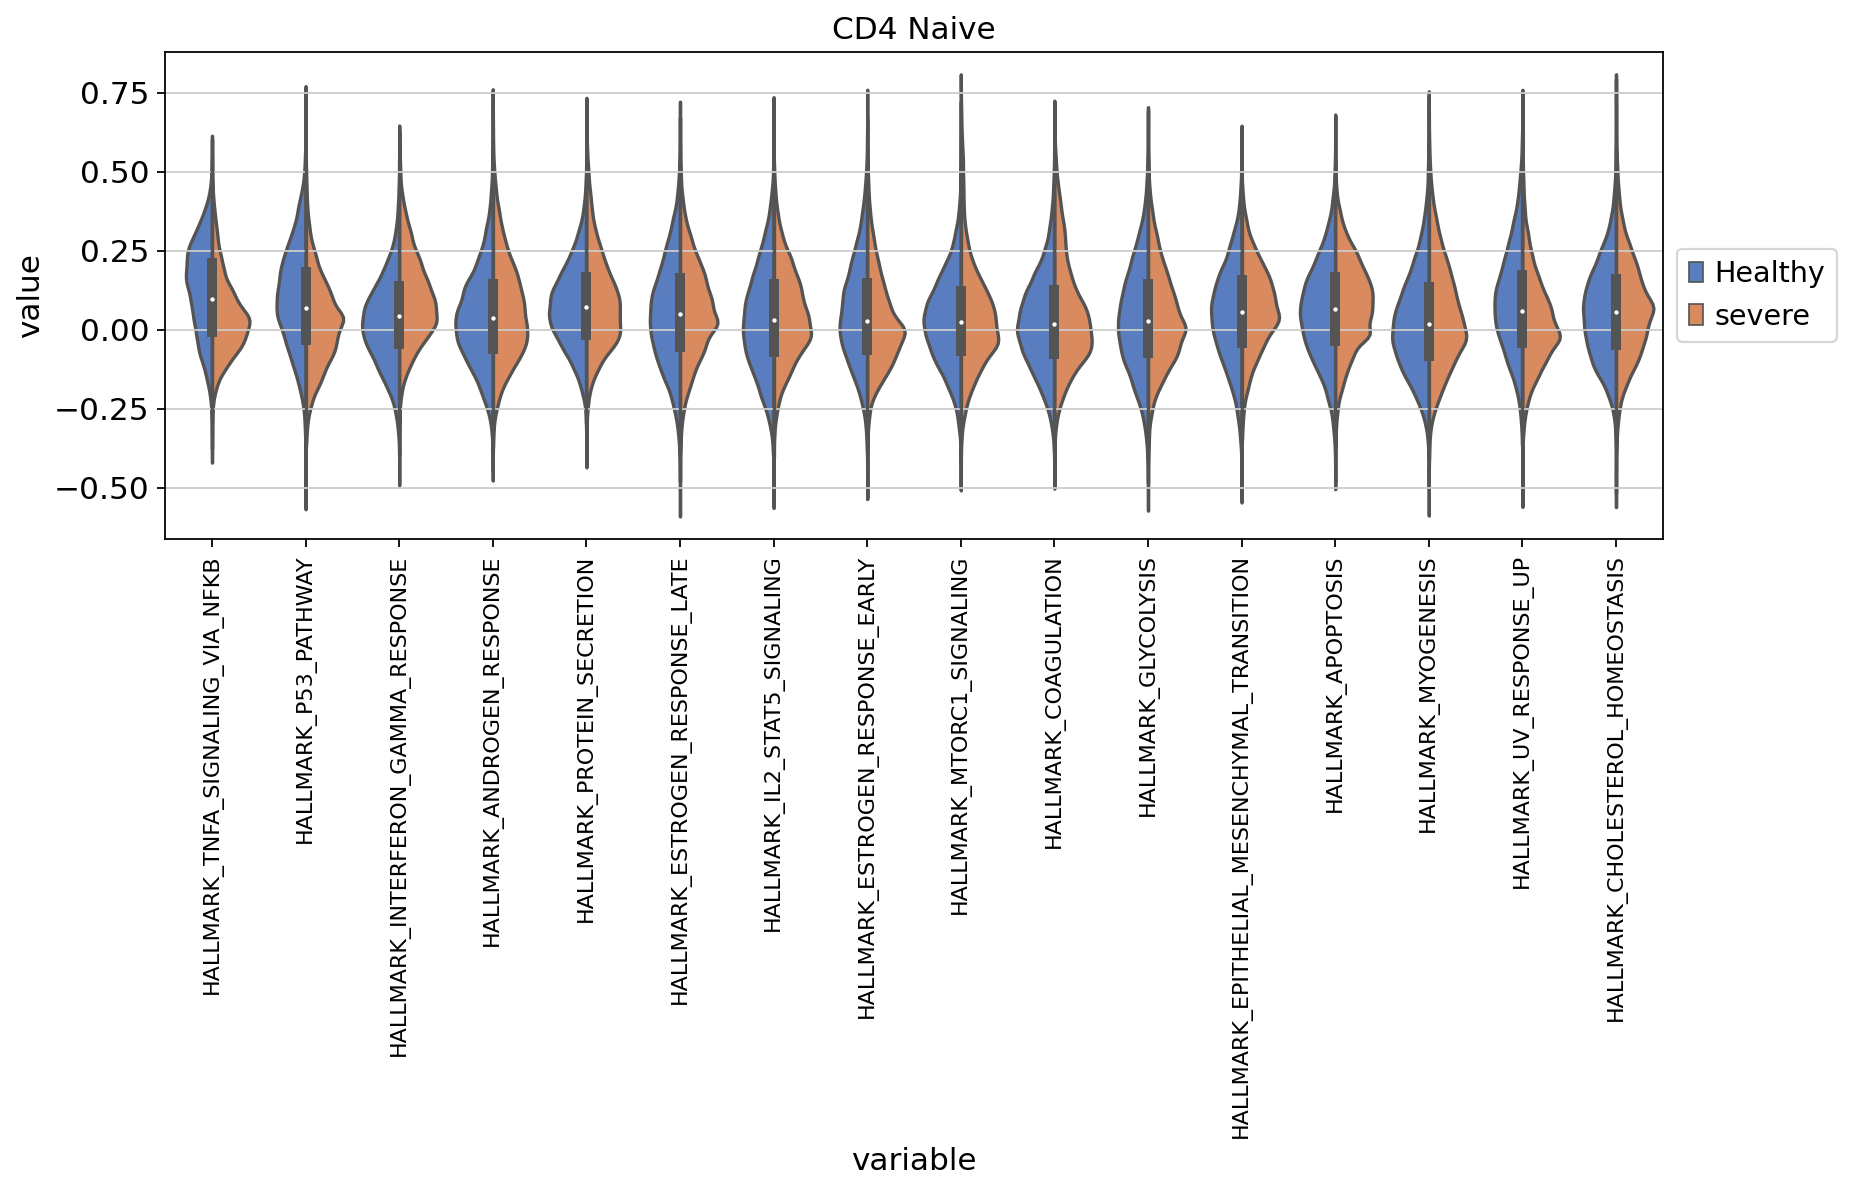

In [78]:
for cell_type in ['CD4 Naive']:
    fig = plt.figure(figsize=(12, 4))
    splotdata = plotdata[plotdata.celltype == cell_type]
    splotdata = plotdata[plotdata.variable.isin(cd4_pathways)]
    
    ax = sns.violinplot(x="variable", y="value", hue="Resp",
                        data=splotdata, palette="muted", split=True)
    ax.set_title(cell_type)
    plt.xticks(rotation=90, fontsize =10)
    fig.canvas.draw()
    fig.tight_layout()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig(f'figures/violin_celltype_{cell_type}.png', bbox_inches='tight')